# 1. Load index

In [1]:
import genomics_data_index

print(genomics_data_index.__version__)

0.4.0.dev1


In [5]:
import genomics_data_index.api as gdi

db = gdi.GenomicsDataIndex.connect('index')
db

<GenomicsDataIndex(samples=85)>

# 2. Load metadata

In [23]:
import pandas as pd

metadata_df = pd.read_csv('metadata.tsv', sep='\t')
metadata_df['cluster'] = metadata_df['outbreak']
metadata_df.loc[metadata_df['cluster'] == 'outgroup', 'cluster'] = pd.NA
metadata_df

,dataSetName,strain,outbreak,suggestedReference,cluster
0,0810PADBR-1,D5663,outgroup,False,<NA>
1,0810PADBR-1,D7321,0810PADBR-1,False,0810PADBR-1
2,0810PADBR-1,D7331,0810PADBR-1,True,0810PADBR-1
3,0810PADBR-1,D7319,0810PADBR-1,False,0810PADBR-1
4,0810PADBR-1,D7323,0810PADBR-1,False,0810PADBR-1
...,...,...,...,...,...
80,1203NYJAP-1 - Tuna Scrape Outbreak,CFSAN000970,1203NYJAP-1,False,1203NYJAP-1
81,1203NYJAP-1 - Tuna Scrape Outbreak,CFSAN001112,1203NYJAP-1,False,1203NYJAP-1
82,1203NYJAP-1 - Tuna Scrape Outbreak,CFSAN001115,1203NYJAP-1,False,1203NYJAP-1
83,1203NYJAP-1 - Tuna Scrape Outbreak,CFSAN001118,1203NYJAP-1,False,1203NYJAP-1


# 3. Kmer tree

In [24]:
q = db.samples_query().join(metadata_df, sample_names_column='strain')
q

<DataFrameSamplesQuery[selected=100% (85/85) samples, unknown=0% (0/85) samples]>

In [25]:
qkmer_31 = q.build_tree(kind='kmer', kmer_size=31)
qkmer_31

<KmerTreeSamplesQuery[selected=100% (85/85) samples, unknown=0% (0/85) samples]>

In [26]:
q_campy = qkmer_31.isa('0810PADBR-1', isa_column='dataSetName', kind='dataframe')
q_ecoli = qkmer_31.isa('1405WAEXK-1', isa_column='dataSetName', kind='dataframe')
q_listeria = qkmer_31.isa('1408MLGX6-3WGS', isa_column='dataSetName', kind='dataframe')
q_salmonella = qkmer_31.isa('1203NYJAP-1 - Tuna Scrape Outbreak', isa_column='dataSetName', kind='dataframe')

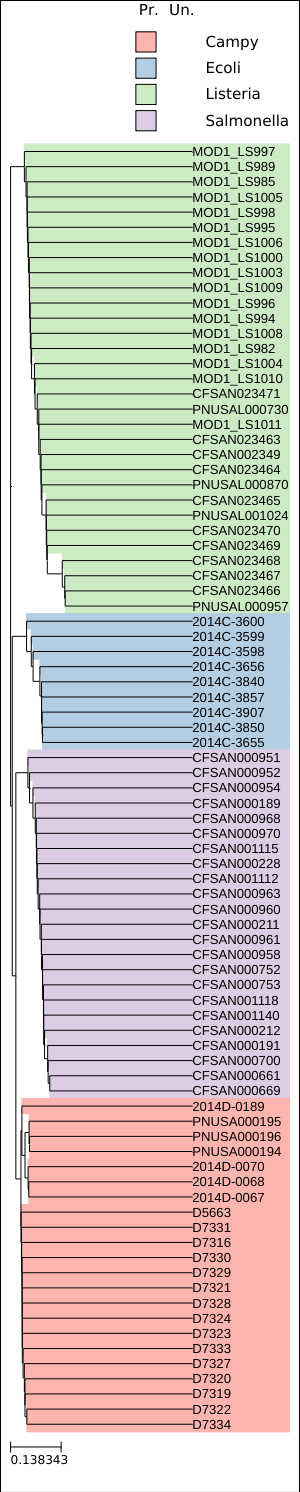

In [27]:
qkmer_31.tree_styler()\
 .highlight(q_campy, legend_label='Campy')\
 .highlight(q_ecoli, legend_label='Ecoli')\
 .highlight(q_listeria, legend_label='Listeria')\
 .highlight(q_salmonella, legend_label='Salmonella')\
 .render(w=300)

In [29]:
from genomics_data_index.api.query.impl.ClusterScorer import ClusterScorer

min_samples_cluster = 2

scorer = ClusterScorer(qkmer_31)
scores_organism = scorer.score_groupby(groupby_column='dataSetName', min_samples_count=min_samples_cluster)
scores_organism

,Score,Sample Count
dataSetName,,
0810PADBR-1,1.0,22
1203NYJAP-1 - Tuna Scrape Outbreak,1.0,23
1405WAEXK-1,1.0,9
1408MLGX6-3WGS,1.0,31


In [30]:
scores_outbreak = scorer.score_groupby(groupby_column='cluster', min_samples_count=min_samples_cluster)
scores_outbreak

,Score,Sample Count
cluster,,
0810PADBR-1,1.000000,14
1203NYJAP-1,0.782609,18
1405WAEXK-1,0.333333,3
1408MLGX6-3WGS,0.903226,28
